topic -> llm -> detailed outline -> llm -> topic and outline ...create blog

start -> gen_outline -> gen_blog -> end

In [1]:
# prompt chaining bcz we interact multiple times with our llm
from langgraph.graph import StateGraph, START, END  
from langchain_groq import ChatGroq
from typing import TypedDict
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()
model=ChatGroq(
    groq_api_key = os.getenv("GROQ_API_KEY"),
    model="llama-3.1-8b-instant",
)

In [3]:
class BlogState(TypedDict):
    title: str
    outline : str
    content: str

In [4]:
def create_outline(state: BlogState) -> BlogState:
    # fetch title 
     title= state["title"]
    # call llm and gen outline
     prompt=f"Generate a detail outline for a blog on the topic {title}"
     outline= model.invoke(prompt).content
    # update state
     state["outline"]= outline
     return state

In [5]:
def create_blog(state: BlogState) -> BlogState:
    title= state["title"]
    outline=state["outline"]
    prompt=f"Write a detailed blog on the title using the following outline \n {outline}"
    content= model.invoke(prompt).content
    state["content"] = content
    return state

In [6]:
graph= StateGraph(BlogState)

# add nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)

# add edges

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline","create_blog")
graph.add_edge("create_outline",END)

workflow= graph.compile()

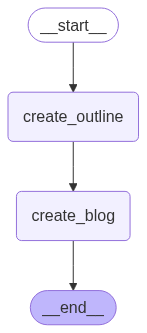

In [9]:
workflow

In [7]:
initial_state= {"title": "Rise of AI in Pakistan"}
final_state=workflow.invoke(initial_state)

In [8]:
print(final_state["outline"])

**Title:** "The Rise of AI in Pakistan: A New Era of Innovation and Opportunities"

**I. Introduction**

- Brief overview of AI and its significance globally
- Importance of AI in Pakistan's economy and society
- Thesis statement: Pakistan is on the cusp of an AI revolution, driven by government initiatives, private sector investments, and a growing talent pool.

**II. Government Initiatives and Policies**

- Overview of the "Pakistan AI Policy" launched in 2021
- Details of the "Artificial Intelligence and Computing (AIC) Authority" established by the government
- Funding and investment opportunities for AI startups and research institutions
- Collaborations with international organizations and foreign governments to promote AI development

**III. Private Sector Investments and Innovations**

- Success stories of Pakistani companies embracing AI, such as:
  - Jazz's AI-powered chatbots
  - UBL's AI-driven customer service
  - HBL's AI-based loan processing
- Overview of the role of ve

In [9]:
print(final_state["content"])

**The Rise of AI in Pakistan: A New Era of Innovation and Opportunities**

**Introduction**

Artificial intelligence (AI) has become a transformative force globally, revolutionizing industries and transforming the way we live and work. From self-driving cars to personalized medicine, AI is making a profound impact on economies and societies worldwide. In Pakistan, the adoption of AI is gaining momentum, driven by government initiatives, private sector investments, and a growing talent pool. The country is on the cusp of an AI revolution, with far-reaching implications for its economy and society.

The significance of AI cannot be overstated. According to a report by McKinsey, the global AI market is expected to reach $190 billion by 2025, with AI-driven innovations transforming industries such as healthcare, finance, and education. In Pakistan, AI has the potential to drive economic growth, create new job opportunities, and improve the quality of life for citizens.

The importance of A